# Dipole radiation
Simulation of a $y$ dipole


In [1]:
import meep as mp
from meep.materials import Al, Ag, Au, SiO2
import numpy as np

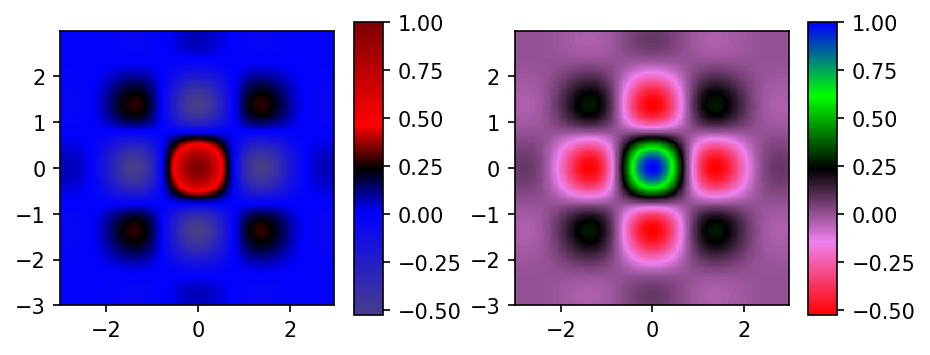

In [2]:
## Define a color map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
##
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    delta = 0.025
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-0.3*X**2 - 0.3* Y**2) * np.cos(2*X) * np.cos(2*Y)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False,dpi=150)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(X,Y,Z,cmap=cmap, rasterized=True,shading='auto')
        ax.set_aspect('equal', 'box')
        fig.colorbar(psm, ax=ax,shrink=0.65)
    plt.show()
##

colors = ["darkslateblue","blue", "black", "red","maroon"]
nodes = [0.0,0.35, 0.5, 0.65, 1.0]
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
colors1 = ["red","violet", "black", "lime","blue"]
nodes1 = [0.0,0.25, 0.5, 0.75, 1.0]
mycmap1 = LinearSegmentedColormap.from_list("mycmap1", list(zip(nodes1, colors1)))
plot_examples([mycmap,mycmap1])

In [3]:
cell = mp.Vector3(3,3,0)
geometry = [ mp.Block(mp.Vector3(mp.inf,0.0005,mp.inf),
                     center=mp.Vector3(),
                      material=Ag),mp.Block(mp.Vector3(0.0005,mp.inf,mp.inf),
                     center=mp.Vector3(0.1,0,0),
                     material=Ag)
]
geometry = []

-----------
Initializing structure...
time for choose_chunkdivision = 0.000103951 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0795999 s
-----------


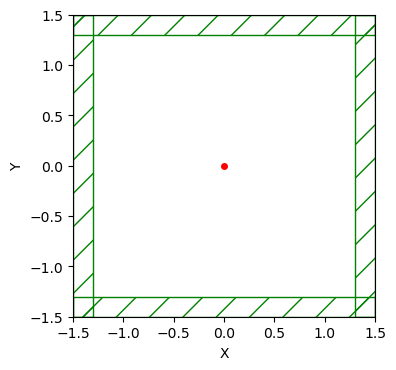

In [4]:
sources = [mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ey,
                     center=mp.Vector3(0,0.0),
                    size=mp.Vector3(0,0))]
pml_layers = [mp.PML(0.2)]
resolution = 100
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()


FloatProgress(value=0.0, description='0% done ', max=6.0)

run 0 finished at t = 6.0 (1200 timesteps)


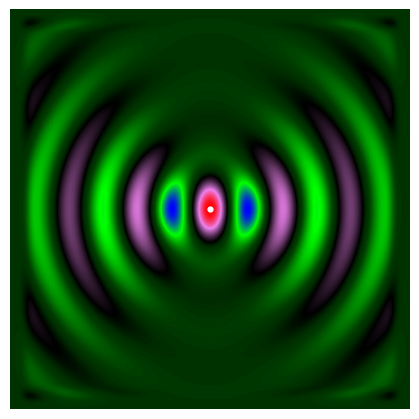

In [5]:
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 1.5
    return output
sim.run(until=6)
fig = plt.figure(dpi=100)
#fig, ax = plt.subplots(dpi=300)
ax = plt.Axes(fig, [0.0, 0.0, 1, 1])
ax.set_axis_off()
fig.add_axes(ax)
#plt.figure(dpi=300)
sim.plot2D(ax=ax,fields=mp.Ey,plot_boundaries_flag=False,labels=False,
           field_parameters={'alpha':1, 'cmap':mycmap1,'post_process':modu_f}
           ,source_parameters={'alpha':1,'color':'white','linewidth':1.5,'hatch':'o'})
plt.show()

In [24]:
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.5
    return output
    

#sim.reset_meep()
f = plt.figure(dpi=300)
#ax = plt.Axes(f, [0.0, 0.0, 1, 1])
#ax.set_axis_off()
#fig.add_axes(ax)
#plt.axis('off')
Animate = mp.Animate2D(sim,plot_boundaries_flag=False,
                       fields=mp.Ey, f=f, realtime=False, normalize=True,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                      ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':'o'})
plt.close()

In [25]:
sim.run(mp.at_every(0.02,Animate),until=1-0.02)
plt.close()

FloatProgress(value=84.0, description='0% done ', max=84.98, min=84.0)

on time step 16800 (time=84), 0.0103774 s/step
Normalizing field data...
run 14 finished at t = 84.98 (16996 timesteps)


In [26]:
#filename = "dr.mp4"
gifname = "dr_untrim.gif"
#Animate.to_mp4(10,filename)
Animate.to_gif(6,gifname)

## use imagemagick, +repage to remove virtual canvus
! convert dr_untrim.gif -crop 600x600+623+299  +repage dr.gif 

Generating GIF...


## Dipole Radiation
![dr](./dr.gif )